# **Assignment 6**  
---

### **Subject**:  
**Image Processing**

---

### **Submitted To**:  
**Prof. Dr. Ankita Vaish**  
Department of Computer Science

---

### **Submitted By**:  
**Vishakha Singh**  
Exam Roll No. - 24419MCA041
M.C.A. 2nd Semester

**Academic Year**: 2024-2025


---

In [75]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load Image

In [2]:
img = tf.keras.utils.load_img("Lenna.jpeg")

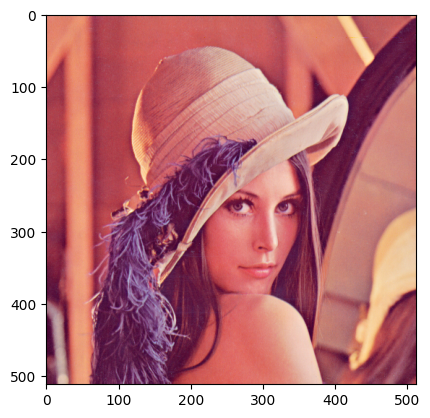

In [3]:
plt.imshow(img)

In [4]:
img = np.array(tf.image.rgb_to_grayscale(img))

In [5]:
img.shape

(512, 512, 1)

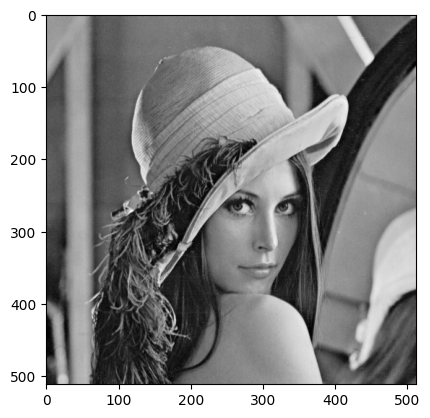

In [6]:
plt.imshow(img, cmap="gray")

### Calculate Histogram

In [7]:
def calculate_histogram(image):
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        hist[pixel] += 1
    return hist

In [8]:
hist = calculate_histogram(img)

<BarContainer object of 256 artists>

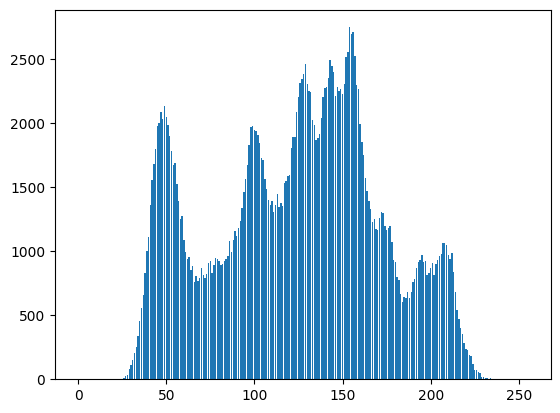

In [9]:
plt.bar(range(len(hist)),hist)

In [10]:
peak_point = np.argmax(hist)

In [93]:
zero_point = np.argmin(hist[peak_point:])+peak_point

In [91]:
hist[235]

1

In [88]:
np.argmin(hist[peak_point:])

82

In [92]:
hist[peak_point:]

array([2745, 2694, 2708, 2523, 2291, 2262, 1991, 1850, 1746, 1570, 1469,
       1390, 1330, 1230, 1248, 1171, 1162, 1260, 1303, 1296, 1196, 1166,
       1178, 1192, 1067,  929,  912,  800,  777,  667,  603,  640,  634,
        679,  632,  678,  757,  779,  864,  915,  932,  969,  913,  921,
        816,  827,  869,  903,  811,  902,  928,  961,  978, 1060, 1065,
       1046,  966,  938,  983,  833,  681,  537,  473,  397,  356,  284,
        233,  231,  192,  182,  121,   76,   72,   59,   48,   20,   19,
          9,    7,    6,    8,    1,    0,    0,    1,    0,    0,    0,
          2,    0,    1,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int64)

In [81]:
zero_point = np.argmin(hist[peak_point:])
zero_point + peak_point

236

In [40]:
zero_point =  254

In [94]:
print(f"Peak Point: {peak_point} and Zero Point: {zero_point}")

Peak Point: 154 and Zero Point: 236


### Shifting Histogram

In [95]:
def shift_image(image,peak_point,zero_point):
    shifted_image  = np.copy(image)
    for i in range(len(shifted_image[0])):
        for j in range(len(shifted_image[1])):
            if shifted_image[i][j][0] in range(peak_point+1,zero_point):
                shifted_image[i][j][0]+=1
    return shifted_image

<BarContainer object of 256 artists>

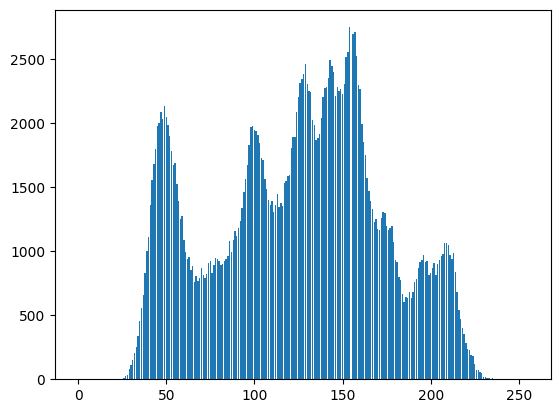

In [96]:
shift = shift_image(img,peak_point,zero_point)
shift_hist = calculate_histogram(shift)
plt.bar(range(len(shift_hist)),shift_hist)

### Embedding Data to image

In [97]:
def embed_bits(image, peak_point, data_bits):
    embedded = image.copy()
    index = 0
    for i in range(embedded.shape[0]):
        for j in range(embedded.shape[1]):
            if embedded[i, j] == peak_point:
                if index < len(data_bits) and data_bits[index] == 1:
                    embedded[i, j] += 1
                index += 1
    return embedded, data_bits[:index]

In [98]:
data_bits = np.random.randint(0, 2, np.sum(img == peak_point))

In [99]:
embedded_image, embedded_msg = embed_bits(shift,peak_point,data_bits)

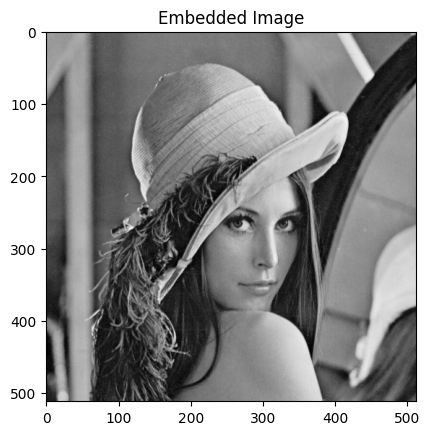

In [100]:
plt.imshow(embedded_image, cmap="gray")
plt.title("Embedded Image")
plt.show()

### Extracting Embedding Bits and Restoring Image

In [101]:
def extract_bits_and_restore(image, peak_point,zero_point,num_bits):
    extracted = []
    restored = image.copy()
    for i in range(restored.shape[0]):
        for j in range(restored.shape[1]):
            if restored[i][j][0] == peak_point:
                extracted.append(0)
            elif restored[i][j][0] == peak_point + 1:
                extracted.append(1)
                restored[i][j][0] -= 1
    return np.array(extracted[:num_bits]), restored
recovered_bits, recovered_img = extract_bits_and_restore(embedded_image, peak_point,zero_point,num_bits=len(embedded_msg))

### Shifiting Back image Pixels to original Position

In [102]:
def shift_image_back(image,peak_point,zero_point):
    shifted_image  = np.copy(image)
    for i in range(len(shifted_image[0])):
        for j in range(len(shifted_image[1])):
            if shifted_image[i][j][0] in range(peak_point+2,zero_point+1):
                shifted_image[i][j][0]-=1
    return shifted_image

In [103]:
recovered_shift_img = shift_image_back(recovered_img,peak_point,zero_point)

In [106]:
print("Data recovered") if np.array_equal(recovered_bits,embedded_msg) else print("Not recovered")
print("Image Recovered") if np.array_equal(img,recovered_shift_img) else print("Image Not Recovered")

Data recovered
Image Recovered
